In [1]:
import numpy as np
import pandas as pd
import keras,os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Model

In [3]:
train_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
val_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'
test_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test'

In [4]:
def crop_img(img):
    img = cv2.resize(img, (100, 100))
    return img

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gen_train = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, rotation_range=40, preprocessing_function=crop_img)

data_train = img_gen_train.flow_from_directory(directory=train_dir, target_size=(100,100), color_mode="rgb",
                                               batch_size=32, class_mode="categorical", shuffle=True, seed=42)

img_gen_val = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, rotation_range=40, preprocessing_function=crop_img)

data_val = img_gen_train.flow_from_directory(directory=val_dir, target_size=(100,100), color_mode="rgb",
                                               batch_size=32, class_mode="categorical", shuffle=True, seed=42)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
data_train.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [7]:
pre_model = VGG16(weights = 'imagenet',include_top = False,input_shape = (100,100, 3))

for layer in pre_model.layers:
    layer.trainable = False

pre_model.summary()

2022-04-27 08:07:55.478446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 08:07:55.609898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 08:07:55.611091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-27 08:07:55.612904: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________________

In [8]:
last_layer = Flatten()(pre_model.output)
final_layer = Dense(2, activation='softmax')(last_layer)

model = Model(inputs=pre_model.input, outputs=final_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [9]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
hist = model.fit(data_train, epochs=20 ,validation_data=data_val)

2022-04-27 08:07:59.976938: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-04-27 08:08:01.917491: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


313/313 [==============================] - 108s 321ms/step - loss: 0.1124 - accuracy: 0.9595 - val_loss: 0.0633 - val_accuracy: 0.9750
Epoch 2/20
313/313 [==============================] - 52s 167ms/step - loss: 0.0542 - accuracy: 0.9813 - val_loss: 0.0580 - val_accuracy: 0.9762
Epoch 3/20
313/313 [==============================] - 52s 166ms/step - loss: 0.0429 - accuracy: 0.9847 - val_loss: 0.0503 - val_accuracy: 0.9812
Epoch 4/20
313/313 [==============================] - 52s 166ms/step - loss: 0.0355 - accuracy: 0.9877 - val_loss: 0.0361 - val_accuracy: 0.9862
Epoch 5/20
313/313 [==============================] - 53s 168ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0365 - val_accuracy: 0.9887
Epoch 6/20
313/313 [==============================] - 52s 167ms/step - loss: 0.0298 - accuracy: 0.9896 - val_loss: 0.0350 - val_accuracy: 0.9875
Epoch 7/20
313/313 [==============================] - 53s 168ms/step - loss: 0.0252 - accuracy: 0.9906 - val_loss: 0.0320 - val_accuracy: 0.

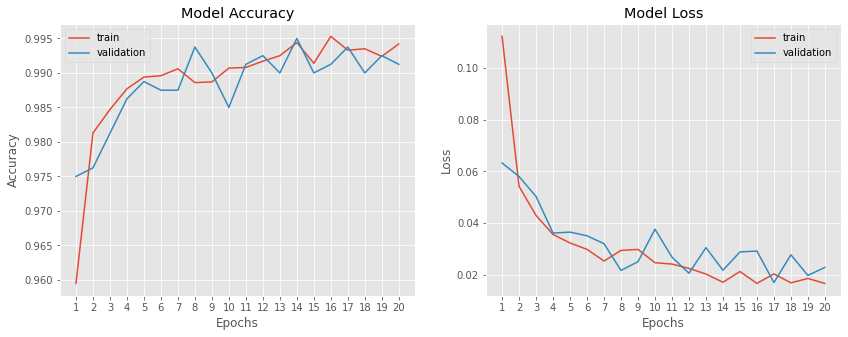

In [10]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.xticks(np.arange(len(hist.history['accuracy'])), np.arange(1, len(hist.history['accuracy'])+1))


plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.xticks(np.arange(len(hist.history['accuracy'])), np.arange(1, len(hist.history['accuracy'])+1))
plt.show()

* Epochs: Total number of iterations to train the model
* Accuracy: Ratio of correct predictions to total predictions
* Loss: Difference between predicted values and actual values

In [11]:
model.save('face_mask.h5')

In [12]:
def mask_prediction(path):
    predict_datagen = ImageDataGenerator(rescale=1./255)
    ans={0:'Withmask', 1:'withoutmask'}
    img = cv2.imread(path)
    img = cv2.resize(img, (100,100))
    plt.imshow(img)
    img = np.array(img).reshape((1, 100,100, 3))
    Y_pred = model.predict(img)
    y_pred = np.argmax(Y_pred, axis=1)
    print(Y_pred)
    print(y_pred)
    print(ans[y_pred[0]])

[[1.0000000e+00 4.3555265e-18]]
[0]
Withmask


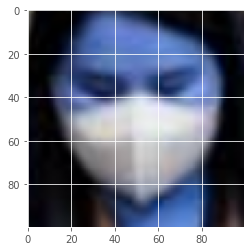

In [13]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1406.png')

[[1. 0.]]
[0]
Withmask


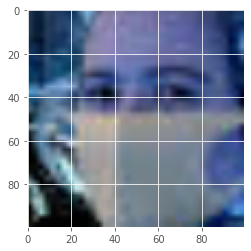

In [14]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1837.png')

[[1. 0.]]
[0]
Withmask


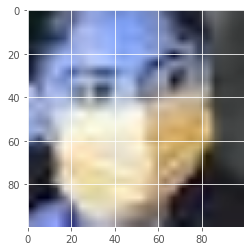

In [15]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1607.png')

[[0. 1.]]
[1]
withoutmask


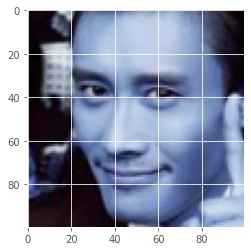

In [16]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/141.png')

[[0. 1.]]
[1]
withoutmask


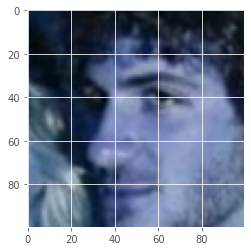

In [17]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1176.png')

[[0. 1.]]
[1]
withoutmask


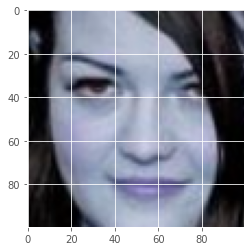

In [18]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/151.png')

[[1. 0.]]
[0]
Withmask


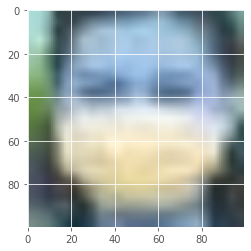

In [19]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask/1362.png')

[[0. 1.]]
[1]
withoutmask


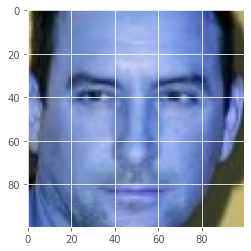

In [20]:
mask_prediction('../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1160.png')